In [1]:
# import and init libraries

from pandas import DataFrame, read_csv

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# enable inline plotting
%matplotlib inline

#sns.set(style="white")

In [2]:
CABLE        = 'imc20/data/date-nettype-cable.dat'
CONTENT      = 'imc20/data/date-nettype-content.dat'
EDU          = 'imc20/data/date-nettype-edu.dat'
ENTERPRISE   = 'imc20/data/date-nettype-enterprise.dat'
NA           = 'imc20/data/date-nettype-na.dat'
NONPROFIT    = 'imc20/data/date-nettype-nonprofit.dat'
NOTDISCLOSED = 'imc20/data/date-nettype-notdisclosed.dat'
NSP          = 'imc20/data/date-nettype-nsp.dat'

cable        = pd.read_csv(CABLE,
                delim_whitespace=True,
                names=['Date', 'Cable/DSL/ISP'],
                parse_dates=['Date'],
                index_col=0)
content      = pd.read_csv(CONTENT,
                delim_whitespace=True,
                names=['Date', 'Content'],
                parse_dates=['Date'],
                index_col=0)
edu          = pd.read_csv(EDU,
                delim_whitespace=True,
                names=['Date', 'Education/Research'],
                parse_dates=['Date'],
                index_col=0)
enterprise   = pd.read_csv(ENTERPRISE,
                delim_whitespace=True,
                names=['Date', 'Enterprise'],
                parse_dates=['Date'],
                index_col=0)
na           = pd.read_csv(NA,
                delim_whitespace=True,
                names=['Date', 'NA'],
                parse_dates=['Date'],
                index_col=0)
nonprofit    = pd.read_csv(NONPROFIT,
                delim_whitespace=True,
                names=['Date', 'Non-Profit'],
                parse_dates=['Date'],
                index_col=0)
notdisclosed  = pd.read_csv(NOTDISCLOSED,
                delim_whitespace=True,
                names=['Date', 'Not Disclosed'],
                parse_dates=['Date'],
                index_col=0)
nsp           = pd.read_csv(NSP,
                delim_whitespace=True,
                names=['Date', 'NSP'],
                parse_dates=['Date'],
                index_col=0)

In [3]:
df = pd.concat([cable,content,edu,enterprise,na,nonprofit,notdisclosed,nsp], axis=1, sort=False)

# reindex, fill missing values with -1 (usually you can keep it at nan)
df.index = pd.to_datetime(df.index) # make sure you have timestamps
df = df.reindex( pd.date_range("2019-03-01", "2020-04-01", freq="D") )
# df = df.fillna(value=-1)

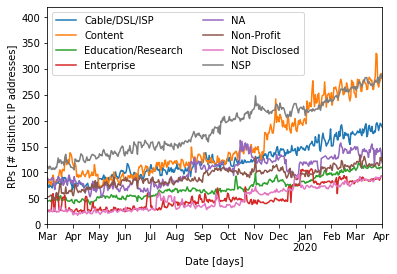

In [4]:
ax = df.plot()
ax.set_ylabel('RPs [# distinct IP addresses]')
ax.set_xlabel('Date [days]')
ax.grid(False)

ax.set_ylim(0,420)

#nettype.spines["top"].set_visible(False)
#nettype.spines["right"].set_visible(False)

plt.legend(ncol=2)

ax.tick_params(which='minor', bottom=False)

# save and explicitly close figure
fig = ax.get_figure()
fig.savefig("imc20/netmapping.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)